# Homework 2: One-Way Between-Subjects Designs
## PSYC5501: Experimental Design & Statistics
### Seung Kim, October 8, 2020

Teri et al. (1997) were interested in examining nonpharmacological treatments of patients with Alzheimer’s disease suffering from depression. They had two behavioral treatments, one emphasizing pleasant events (BT-PE) and the other emphasizing caregiver problem solving (BT-PS). They also had a typical care group (TCC) and a waitlist control group (WLC). The dependent variable was the change in depression, as measured by the Hamilton Depression Rating Scale, from the beginning of the treatment to the end. Higher scores indicate more improvement.

In [1]:
library(psych)
library(ggplot2, warn.conflicts=FALSE)
library(MBESS, warn.conflicts=FALSE)

#### **1. Use R to create a plot that shows boxplots for the four groups. You may use the plot functions in base R, or you may use ggplot2.**

**Solution.** We import the CSV file, and look at some descriptive statistics by groups 1-4. The means tell us that, at least superficially, there is a pretty big gap between the behavioral treatment groups versus the non-treatment groups (1-2 vs. 3-4). So that's an encouraging sign for us to keep going with our analysis. 

In [2]:
teri <- read.csv('/Users/seung/Repositories/stats/HW2/Teri.csv')
teri = data.frame(teri)

In [3]:
teri$Group <- factor(teri$Group, labels = c("PE", "PS", "TC", "WC"))
describeBy(teri$Change, teri$Group)


 Descriptive statistics by group 
group: PE
   vars  n mean   sd median trimmed  mad   min   max range  skew kurtosis  se
X1    1 23 4.27 3.82   4.13    4.35 4.37 -3.55 12.46 16.01 -0.04    -0.65 0.8
------------------------------------------------------------ 
group: PS
   vars  n mean   sd median trimmed mad   min  max range skew kurtosis   se
X1    1 19 5.09 2.94   4.85    5.15 3.1 -0.84 9.89 10.73 0.02     -0.8 0.67
------------------------------------------------------------ 
group: TC
   vars  n  mean   sd median trimmed  mad   min  max range  skew kurtosis   se
X1    1 10 -0.72 2.93   0.05   -0.34 2.65 -6.56 2.13  8.69 -0.72       -1 0.93
------------------------------------------------------------ 
group: WC
   vars  n mean   sd median trimmed  mad  min  max range  skew kurtosis   se
X1    1 20 0.36 2.65   0.34    0.49 2.62 -5.2 4.49  9.69 -0.26     -0.7 0.59

We draw boxplots for the four groups:

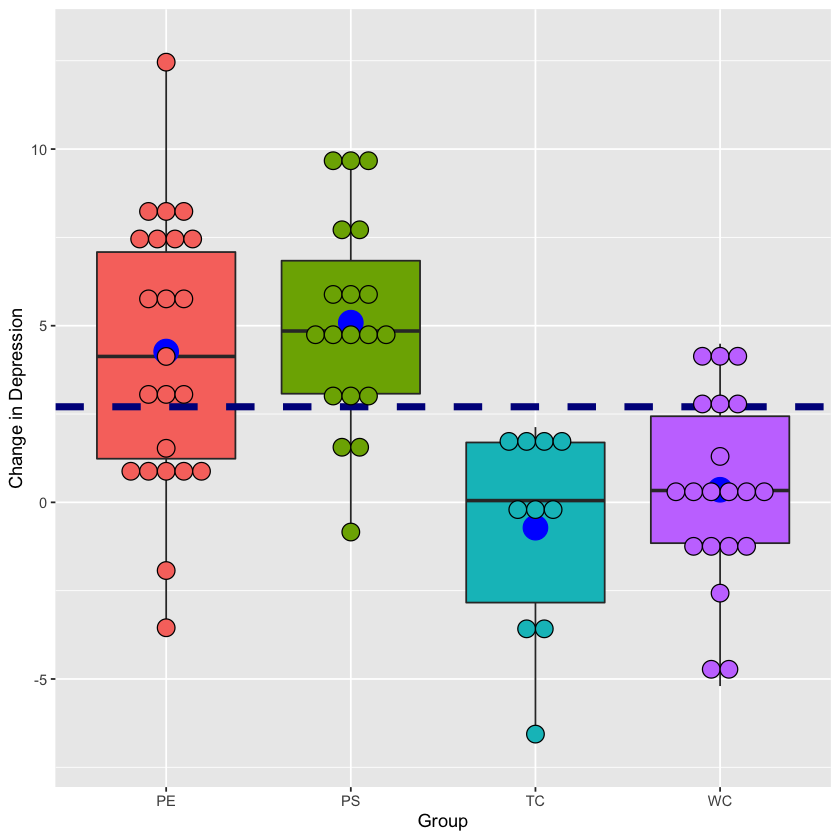

In [4]:
ggplot(teri, aes(x=Group, y=Change, fill=Group)) +
  labs(y='Change in Depression') +
  geom_boxplot(show.legend=FALSE) +
  stat_summary(fun=mean, geom='point', shape=20, size=10, color='blue', fill='blue') +
  geom_hline(yintercept=mean(teri$Change), linetype='dashed', color='darkblue', size=2) +
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0.5, show.legend=FALSE, binwidth=1)

#### **2. Using the GLM approach, test the hypothesis that there are no group differences in the average change in depression. Write the full and restricted models using the effects parameterization rather than the cell means parameterization (i.e., using $α_j$). You may use R, but be sure to clearly identify in your output all of the relevant model terms, including the error and degrees of freedom for the full and restricted models.**

**Solution.** Let's start with the full and restricted models. Let's quickly get the grand mean of samples to estimate $\mu$:

In [5]:
mean(teri$Change)

[1] 2.705278

Since $\hat{\mu}=2.705$, the full and restricted models are:

* **Full**: $Y_{ij} = 2.705+\alpha_j+\epsilon_{ijF}$
* **Restricted**: $Y_{ij}=2.705+\epsilon_{ijR}$

We are essentially trying to figure out how much more error proportional to the degrees of freedom the restricted model brings, by way of the $F$-statistic:

$$F=\frac{(E_R-E_F)/(df_R-df_F)}{E_F/df_F}$$

So, the pieces we need to figure out are $E_F$, $E_R$, $df_F$, and $df_R$. 

Let's figure out the degrees of freedom first. We have measured 72 participants. For the full model, we estimate 4 parameters (the $\mu$ and $\alpha_1, \alpha_2, \alpha_3$—we calculate $\alpha_4$ from these 4 values); for the restricted model, we only estimate 1 parameter (the $\mu$). So, we obtain:
* $df_F=72-4=68$, and 
* $df_R=72-1=71$.

The error calculations are a little more complicated. For the full model, we have 4 groups, each with their own group means; for the restricted model, there is only one grand mean. Rather than summing the squares of errors by hand, we will just use the `aov()` and `anova()` functions.

In [6]:
full = aov(Change ~ Group, data=teri)
restr = aov(Change ~ 1, data=teri)

anova(restr, full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,71,1077.9606,NA,NA,NA,NA
2,68,686.5698,3,391.3908,12.92152,8.958387e-07


`RSS` stands for 'Residual Sum of Squares'—in other words, the sum of squared errors for each model ($E_F$ and $E_R$). So, reading off the table:
* $E_F=686.6$ and 
* $E_R=1078.0$.

which checks out since the $E_R$ will always be larger than $E_F$. 

The `Df` and `Sum of Sq` terms are the difference in degrees of freedom and sum of squared errors, respectively. These check out, too (71-68=3; 1078-687 = 391). 

From the table, we obtain $F=12.923$ and its associated $p=8.958\times 10^{-7}$. Let's just quickly check to see if this checks out:

In [7]:
E_F = 686.5698
E_R = 1077.9606
df_F = 68
df_R = 71

num = (E_R-E_F)/(df_R-df_F)
denom = E_F/df_F
F = num/denom

cat("Close enough!", F)

Close enough! 12.92152

Finally, let's interpret the $p$-value. It tells us that the probability of obtaining this $F$-value or higher given that there is no group differences is 0.0000008958, which is tiny. So, we have a really solid basis for rejecting the null hypothesis that there is no group differences. 

#### **3. What are the values of $α_j$ for each group? How do you interpret these values?**

**Solution.** $\alpha_j$ are, straightforwardly, the additional effects accounted for by estimating group means rather than a single grand mean in constructing our model. The $\mu_j$ in the cell mean approach is further analyzed as $\mu+\alpha_j$ in the effects approach—the effects approach more explicitly separates the effect of each treatment group from the baseline estimate of the population mean. Comparing the full model to the restricted model, because the full model has these group effect factors, it is forced to explain less of the deviations from the grand mean as simply the error ($\epsilon_{ij}$). Let's get their values:

In [8]:
# Calculations for #3
PE = teri$Change[1:23]
PS = teri$Change[24:42] 
TC = teri$Change[43:52]
WC = teri$Change[54:72]
GM = mean(teri$Change)
cat('Grand mean:', GM)

mean(PE)-GM
mean(PS)-GM
mean(TC)-GM
mean(WC)-GM

Grand mean: 2.705278

[1] 1.563418

[1] 2.381038

[1] -3.422278

[1] -2.260541

So, the $\alpha_j$ values are as follows:

| Group | Factor effects ($\alpha_j$) |
| :- | -: |
| BT-PE (Pleasant Events) | $1.563$ |
| BT-PS (Problem Solving) | $2.381$ |
| TCC (Typical Care)      | $-3.422$ |
| WLC (Waitlist Control)  | $-2.261$ |

More concretely, the full model accounts for these extra deviations from the grand mean as effects rather than error. So, for example, the effect the Pleasant Events group is an additional 1.563 points of improvement from the grand mean; the effect of the Typical Care group is a decrease of 3.422 points of improvement from the grand mean. 

#### **4. What is the p-value for the model comparison? What can you conclude about group differences based on the results?**

**Solution.** See end of #2.

#### **5. Now, carry out the same hypothesis test, but use the traditional ANOVA framework in R. Identify how the values from the summary table correspond to the values you computed within the GLM framework in #2.**



**Solution.** In #2, I already used the `anova()` function in R to carry out the hypothesis test. It is reproduced here for convenience:

In [9]:
full = aov(Change ~ Group, data=teri)
restr = aov(Change ~ 1, data=teri)

anova(restr, full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,71,1077.9606,NA,NA,NA,NA
2,68,686.5698,3,391.3908,12.92152,8.958387e-07


Let's quickly identify the correspondences between traditional ANOVA and GLM values. Given the $F$-statistic function:

$$F=\frac{(E_R-E_F)/(df_R-df_F)}{E_F/df_F}$$

We see four principal components: $(E_R-E_F)$, $(df_R-df_F)$, $E_F$, and $df_F$. These correspond to the traditional ANOVA terms in the following way:

* $SS_{between} = (E_R-E_F)$, since $E_R-E_F$ is the sum of squares of differences *between* errors of the full and restricted models, 
* $SS_{within} = E_F$, since $E_F$ is just the sum of squares of errors *within* the full model,
* $df_{between} = (df_R-df_F)$, since we're just getting the difference *between* the degrees of freedom between teh full and restricted models, and
* $df_{within} = df_F$, since we're just getting the degree of freedom *within* the full model.

And since $SS_{between}/df_{between} = MS_{between}$ (Mean Squares, meaning $SS_{between}$ averaged over $df_{between}$) and $SS_{within}/df_{within} = MS_{within}$ (likewise, mean square or $SS_{within}$ averaged over $df_{within}$), the numerator and denominator of the GLM version correspond to $MS_{between}$ and $MS_{within}$, respectively.

$$F=\frac{(E_R-E_F)/(df_R-df_F)}{E_F/df_F} = \frac{MS_{between}}{MS_{within}}$$

#### **6.	What is $R^2$ and its 95% confidence interval? Provide an interpretation.**



**Solution.** The $R^2$ measures the association strength between the variability in the DV and the variability in the IV—in our case, the IV is the group type, and the DV is the change in depression scores. It essentially asks: how much does knowing under what group an individual falls reduce the amount of error in predicting the DV? 

We can quickly calculate the $R^2$ according to the following formula:

$$R^2 = \frac{E_R-E_F}{E_R}$$

In [10]:
# reproduced for convenience
E_F = 686.5698
E_R = 1077.9606

R2 = (E_R-E_F)/E_R
print(R2)

[1] 0.3630845


And we can, using R, calculate the 95% confidence interval.

In [11]:
ci.R2(R2=0.3631, df.1=3, df.2=68, conf.level=0.95)

$Lower.Conf.Limit.R2
[1] 0.1619269

$Prob.Less.Lower
[1] 0.025

$Upper.Conf.Limit.R2
[1] 0.5178527

$Prob.Greater.Upper
[1] 0.025

So, the results are:

* $R^2=0.3631$
* $95\% \text{ CI}= [0.1619, 0.5179]$

And we can interpret these values as follows: only 36.31% of the variability in the dependent variable, the change in depression scores, is explained by membership in the four groups. We are 95% confident that the true $R^2$ lies in $[0.1619, 0.5179]$.

*I am quickly verifying my findings with the below lines. My $R^2$ matches the `Multiple R-squared` figure in the output, but I cannot figure out why the grand mean (`(Intercept)`) is showing up as 2.2486 rather than 2.7053 (which is, as far as I can tell, definitely the correct grand mean). Do you have any ideas why this might be?*

In [12]:
full_eff = lm(Change ~ Group, data=teri, contrasts=list(Group=contr.sum))
summary(full_eff)


Call:
lm(formula = Change ~ Group, data = teri, contrasts = list(Group = contr.sum))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8187 -2.3588  0.0036  2.5445  8.1913 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2486     0.3941   5.706 2.75e-07 ***
Group1        2.0201     0.6122   3.300  0.00154 ** 
Group2        2.8377     0.6488   4.373 4.30e-05 ***
Group3       -2.9656     0.8125  -3.650  0.00051 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.178 on 68 degrees of freedom
Multiple R-squared:  0.3631,	Adjusted R-squared:  0.335 
F-statistic: 12.92 on 3 and 68 DF,  p-value: 8.958e-07


#### **7. Calculate $f$, the standardized typical treatment effect. How do you interpret this value?**



**Solution.** Cohen's $f$ is the ratio between the standard deviation of the treatment effects to the typical within-group standard deviation. 

In [13]:
# reproduced for convenience
full = aov(Change ~ Group, data=teri)
restr = aov(Change ~ 1, data=teri)

anova(restr, full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,71,1077.9606,NA,NA,NA,NA
2,68,686.5698,3,391.3908,12.92152,8.958387e-07


In [14]:
ci.srsnr(F.value = 12.922, df.1 = 3, df.2 = 68, N = 139, conf.level = .0000001)

$Lower.Limit.of.the.Square.Root.of.the.Signal.to.Noise.Ratio
[1] 0.5120661

$Upper.Limit.of.the.Square.Root.of.the.Signal.to.Noise.Ratio
[1] 0.5120661

In [15]:
ci.srsnr(F.value = 12.922, df.1 = 3, df.2 = 68, N = 139, conf.level = 0.95)

$Lower.Limit.of.the.Square.Root.of.the.Signal.to.Noise.Ratio
[1] 0.3199017

$Upper.Limit.of.the.Square.Root.of.the.Signal.to.Noise.Ratio
[1] 0.7035433

We get a value of $f=0.5121$, with a confidence interval of $[0.32, 0.70]$. Since $f>0.40$, we can say that there is a large effect, and we are 95% confident that the true $f$ falls in the $[0.32, 0.70]$ interval.

**Now suppose that the experiment had only included the pleasant events (BT-PE) and problem solving (BT-PS) treatment conditions. You can create a new dataframe called Teri2 that is a subset of the original dataframe using the following code:**

In [16]:
teri2 = subset(teri, Group=='PE'|Group=='PS')

#### **8. Using the GLM approach in R, test whether there is a difference between these two group means. Fit the full and restricted models using the `aov()` function, and then use the `anova()` function to compare the two models. What do you conclude?**


**Solution.** After running the following script:

In [17]:
full = aov(Change ~ Group, data=teri2)
restr = aov(Change ~ 1, data=teri2)

anova(restr, full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,41,483.0043,NA,NA,NA,NA
2,40,476.0487,1,6.955611,0.5844454,0.4490618


We obtain $F=0.5844$ and $p=0.4491$. The $p$-value is way above $\alpha=0.05$. Given that the null hypothesis is true (i.e. that there are no group differences between the Pleasant Events and the Problem Solving groups), we expect to see, 44.9% of the time, an $F$ at least as extreme as 0.5844. We have no reason to reject the null hypothesis that there are no group differences between the Pleasant Events and the Problem Solving groups.

#### **9. Provide a 95% confidence interval for the mean difference. How do you interpret this interval?**

**Solution.** Let's first get the point statistic of the mean difference:

In [18]:
PE = teri2$Change[1:23]
PS = teri2$Change[24:42]
statistic = mean(PE)-mean(PS)
print(statistic)

[1] -0.8176201


Since we know that the confidence interval is

$$\text{statistic} \pm (\text{critical value} \times \text{estimated standard error})$$

we can calculate the CI as follows:


In [19]:
pooled_variance = 476.0487/40
SE = sqrt(pooled_variance*(1/23+1/18))
t = 2.021 # df=40, alpha=0.05, two-tailed
upper = statistic + t*SE
lower = statistic - t*SE
print(upper)
print(lower)

[1] 1.376466
[1] -3.011707


So, we have a mean difference of -0.818 and a confidence interval of $[-3.012, 1.376]$. So we're 95% confident that the true mean difference lies in $[-3.012, 1.376]$.

#### **10. Provide an estimate of $d$, the standardized mean difference, along with its 95% confidence interval. What can you conclude about the size of the effect from the confidence interval?**

**Solution.** Let's first get some requisite descriptive information:

In [20]:
describeBy(teri2$Change, teri2$Group)


 Descriptive statistics by group 
group: PE
   vars  n mean   sd median trimmed  mad   min   max range  skew kurtosis  se
X1    1 23 4.27 3.82   4.13    4.35 4.37 -3.55 12.46 16.01 -0.04    -0.65 0.8
------------------------------------------------------------ 
group: PS
   vars  n mean   sd median trimmed mad   min  max range skew kurtosis   se
X1    1 19 5.09 2.94   4.85    5.15 3.1 -0.84 9.89 10.73 0.02     -0.8 0.67
------------------------------------------------------------ 
group: TC
NULL
------------------------------------------------------------ 
group: WC
NULL

Then, we'll plug these into the `smd()` and `ci.c()` functions.

In [21]:
smd(Mean.1 = 4.27, Mean.2 = 5.09, s.1 = 3.82, s.2 = 2.94, n.1 = 23, n.2 = 19)

[1] -0.2375521

In [22]:
ci.c(means=c(4.27, 5.09), s.anova=sqrt(11.915), c.weights=c(1, -1), n=c(23, 19), N=42, conf.level=0.95) # s_p^2 = 11.915

$Lower.Conf.Limit.Contrast
[1] -2.982786

$Contrast
[1] -0.82

$Upper.Conf.Limit.Contrast
[1] 1.342786

To interpret, since $d=-0.238$, we can say that the Problem Solving group had a slight increase of 0.238 standard deviations in the change in depression scores compared to the Positive Events group. The confidence interval runs $[-2.98, 1.34]$, so we are 95% confident that the true $\delta$ is in this interval. 

Out of curiosity, just checking Cohen's $d$ calculation:

In [23]:
(4.27-5.09)/sqrt(11.915)

[1] -0.2375565